# Prediction of USD/JPY Exchange Rate using Random Forest Classifer

## Preprocessing

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import yfinance as yf

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading dataset

data= yf.download("USDJPY=X", start="2002-01-01", end="2022-12-31")
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-01,131.669998,132.000000,131.240005,131.929993,131.929993,0
2002-01-02,131.940002,132.270004,131.240005,132.139999,132.139999,0
2002-01-03,132.139999,132.149994,131.320007,131.699997,131.699997,0
2002-01-04,131.710007,131.720001,130.639999,131.020004,131.020004,0
2002-01-07,130.699997,131.600006,130.360001,131.250000,131.250000,0


In [34]:
# Checking data information

data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4950 entries, 2003-12-01 to 2022-12-29
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Open             4950 non-null   float64
 1   High             4950 non-null   float64
 2   Low              4950 non-null   float64
 3   Close            4950 non-null   float64
 4   Adj Close        4950 non-null   float64
 5   Volume           4950 non-null   int64  
 6   DayOfWeek        4950 non-null   int64  
 7   Month            4950 non-null   int64  
 8   Tomorrow         4950 non-null   float64
 9   Target           4950 non-null   int64  
 10  Close_Ratio_2    4950 non-null   float64
 11  Trend_2          4950 non-null   float64
 12  Close_Ratio_5    4950 non-null   float64
 13  Trend_5          4950 non-null   float64
 14  Close_Ratio_60   4950 non-null   float64
 15  Trend_60         4950 non-null   float64
 16  Close_Ratio_250  4950 non-null   float64
 

In [32]:
# Checking Index information

type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

## Data Visualization

In [5]:
# Adding Day and Month columns

data['DayOfWeek'] = data.index.dayofweek
data['Month'] = data.index.month
data.head()

,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month
Date,,,,,,,,
2002-01-01,131.669998,132.000000,131.240005,131.929993,131.929993,0,1,1
2002-01-02,131.940002,132.270004,131.240005,132.139999,132.139999,0,2,1
2002-01-03,132.139999,132.149994,131.320007,131.699997,131.699997,0,3,1
2002-01-04,131.710007,131.720001,130.639999,131.020004,131.020004,0,4,1
2002-01-07,130.699997,131.600006,130.360001,131.250000,131.250000,0,0,1


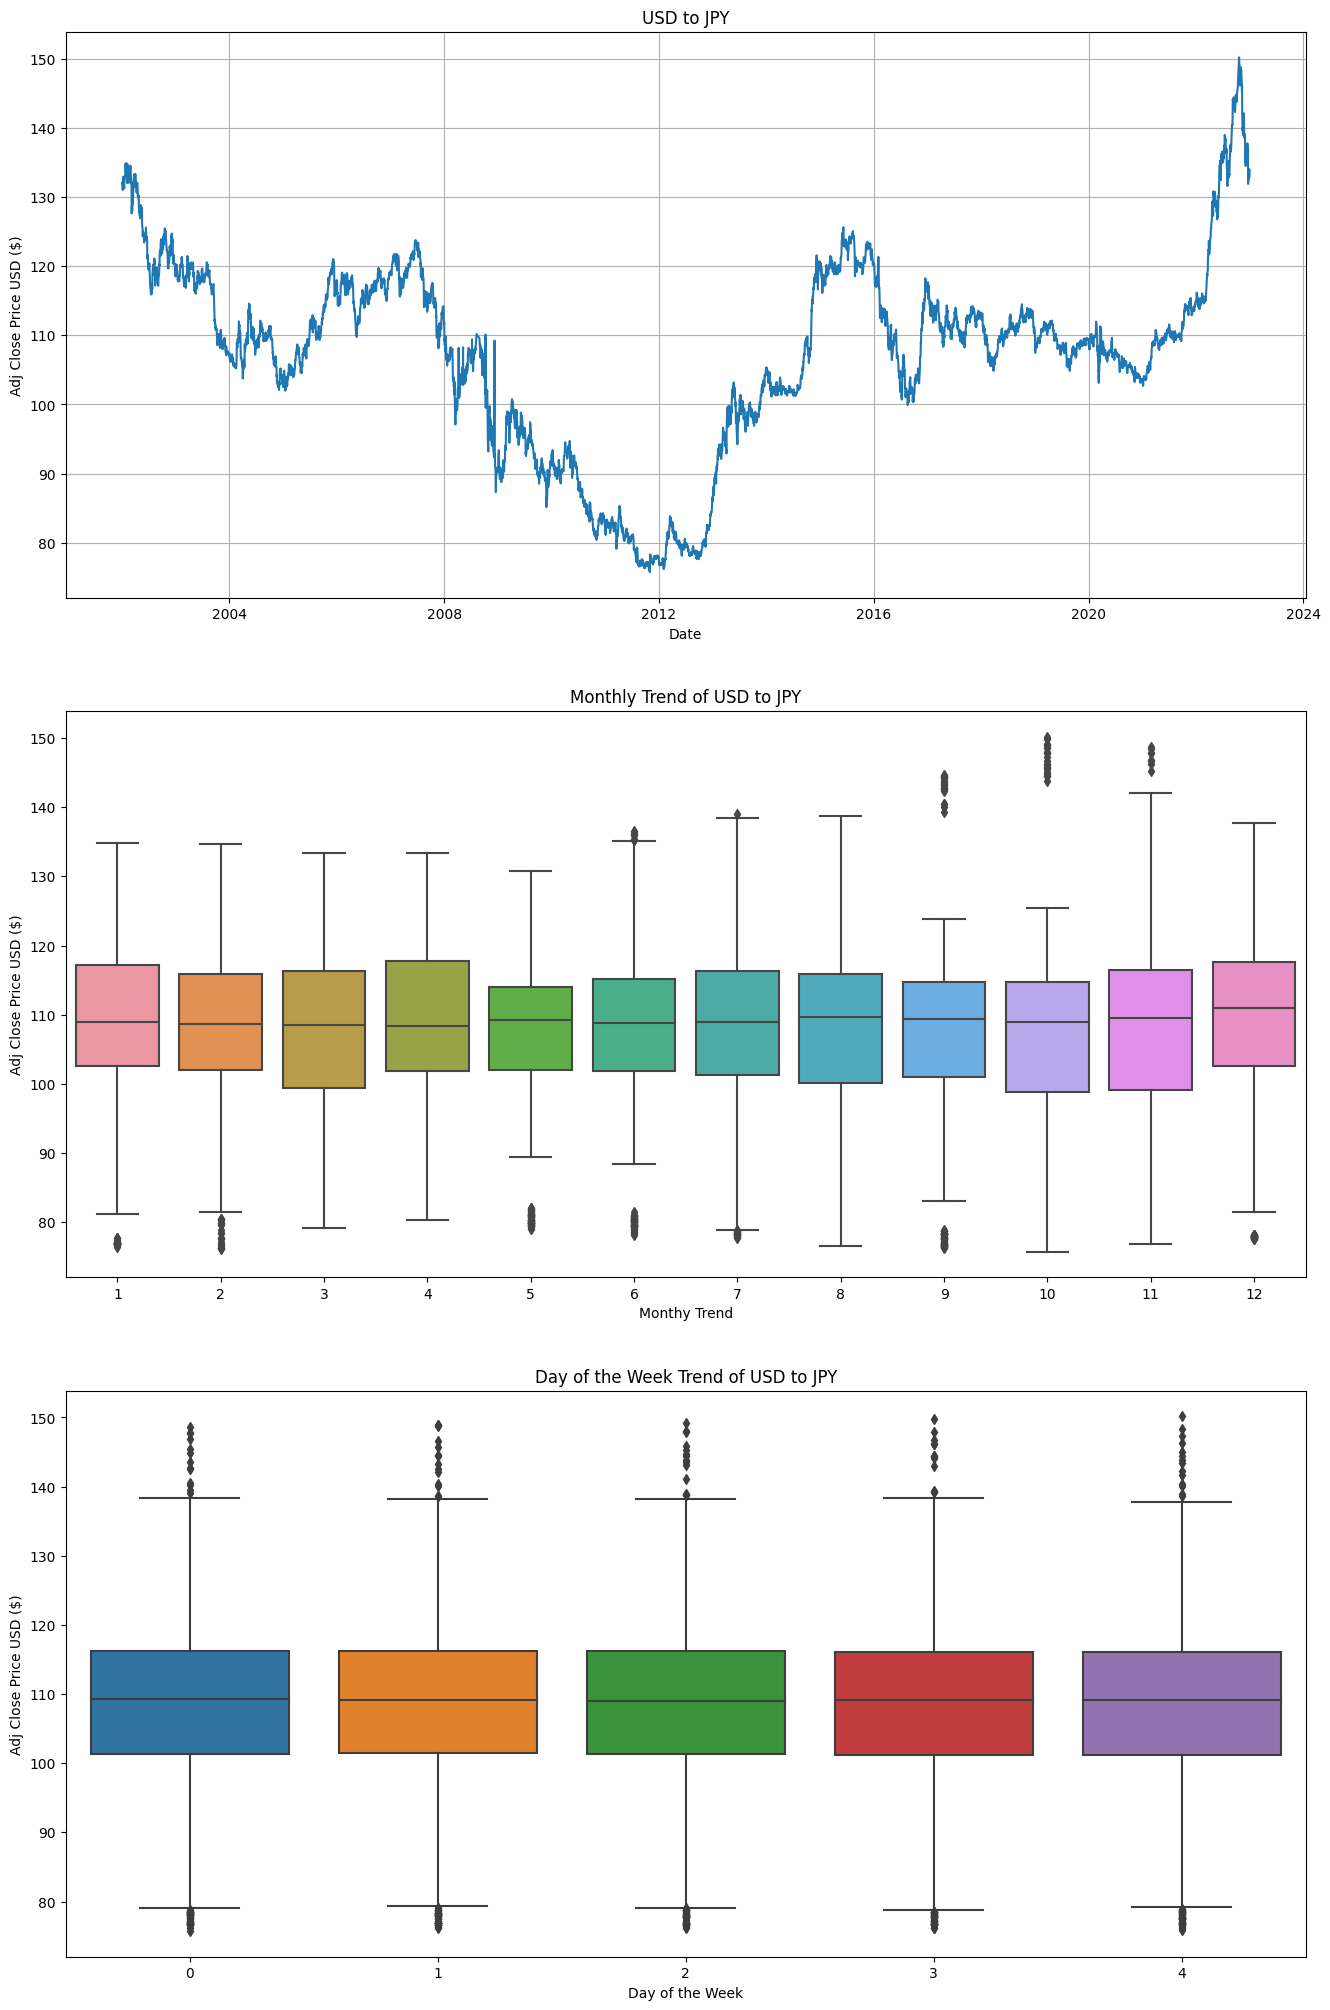

In [6]:
# Data Visualization

fig, ax = plt.subplots(3,1, figsize=(16,25))

# Line Plot of Adjusted Close against Date
ax[0].plot(data['Adj Close'])
ax[0].grid(True)
ax[0].set_title('USD to JPY')
ax[0].set_ylabel('Adj Close Price USD ($)')
ax[0].set_xlabel('Date')

# Box Plot of Monthly trend of Adjusted Close
sns.boxplot(x=data['Month'], y=data['Adj Close'], ax=ax[1])
ax[1].set_title('Monthly Trend of USD to JPY')
ax[1].set_ylabel('Adj Close Price USD ($)')
ax[1].set_xlabel('Monthy Trend')

# Box Plot of Day of the Week trend of Adjusted Close
sns.boxplot(x=data['DayOfWeek'], y=data['Adj Close'], ax=ax[2])
ax[2].set_title('Day of the Week Trend of USD to JPY')
ax[2].set_ylabel('Adj Close Price USD ($)')
ax[2].set_xlabel('Day of the Week')

plt.show()

## Target & Features

In [7]:
# Setting Target Column

# Creating a new column 'Tomorrow', with tomorrow's price
data['Tomorrow'] = data['Adj Close'].shift(-1)

# Creating a new column 'Target', with 1 if Tomorrow's price is higher than today's price, otherwise 0
data['Target'] = (data['Tomorrow']>data['Adj Close']).astype(int)

data.head()

,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Tomorrow,Target
Date,,,,,,,,,,
2002-01-01,131.669998,132.000000,131.240005,131.929993,131.929993,0,1,1,132.139999,1
2002-01-02,131.940002,132.270004,131.240005,132.139999,132.139999,0,2,1,131.699997,0
2002-01-03,132.139999,132.149994,131.320007,131.699997,131.699997,0,3,1,131.020004,0
2002-01-04,131.710007,131.720001,130.639999,131.020004,131.020004,0,4,1,131.250000,1
2002-01-07,130.699997,131.600006,130.360001,131.250000,131.250000,0,0,1,132.919998,1


In [8]:
# Setting Features

features = ['Open', 'High', 'Low', 'Adj Close', 'Month', 'DayOfWeek']

## Train Test Split

In [9]:
# Spliting Train and Test Data

train = data.iloc[:-250]
test = data.iloc[-250:]

print(train.shape, test.shape)


(5200, 10) (250, 10)


## Random Forest Classifier

In [10]:
# Importing Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

In [11]:
# Iinitializing Random Forest Classifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=10, random_state=1)

# Fitting Model
model.fit(train[features], train['Target'])

RandomForestClassifier(min_samples_split=10, random_state=1)

### Measuring Precision Score

In [12]:
# Measuring Precision Score

from sklearn.metrics import precision_score

preds = model.predict(test[features])

# Changing to Pandas Series
preds = pd.Series(preds, index=test.index)


precision_score(test['Target'], preds)

print(f"Precision Score: {precision_score(test['Target'], preds)}")

Precision Score: 0.675


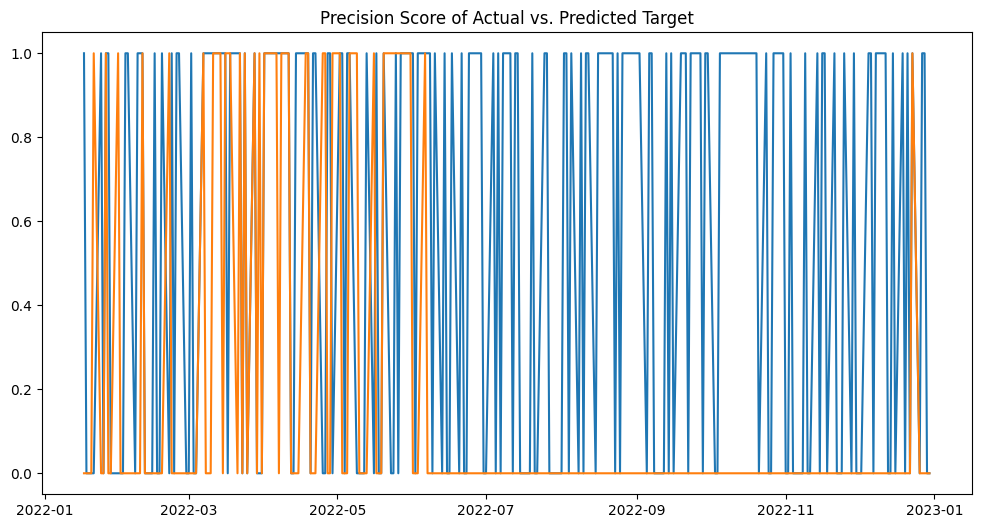

In [31]:
# Ploting Precision Score

combined = pd.concat([test['Target'], preds], axis=1)

plt.figure(figsize=(12,6))
plt.plot(combined)
plt.title('Precision Score of Actual vs. Predicted Target')
plt.show()

## Back Testing

In [14]:
# Creating Prediction function

def predict(train, test, features, model):
    model.fit(train[features], train['Target'])
    preds = model.predict(test[features])
    preds = pd.Series(preds, index =test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)
    return combined

In [15]:
# Creating backtest function

def backtest(data, model,  features, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()

        predictions = predict(train, test, features, model)
        all_predictions.append(predictions)

    return pd.concat(all_predictions)

In [16]:
# back test

predictions = backtest(data, model, features)

In [17]:
# Evaluating Errors of predictions

predictions['Predictions'].value_counts()

0    1611
1    1339
Name: Predictions, dtype: int64

In [18]:
# Precision Score

precision_score(predictions['Target'], predictions['Predictions'])

print(f"Precision Score: {precision_score(predictions['Target'], predictions['Predictions'])}")

Precision Score: 0.6056758775205378


In [19]:
# % Of Correct Predictions

predictions['Target'].value_counts()/predictions.shape[0]

1    0.521017
0    0.478983
Name: Target, dtype: float64

## Adding Predictors to Model

In [20]:
# Addition predictors

horizons = [2,5,60,250,500]
new_predictors = []

for horizon in horizons:
    rolling_averages = data.rolling(horizon).mean()

    ratio_column = f'Close_Ratio_{horizon}'
    data[ratio_column] = data['Adj Close'] / rolling_averages['Adj Close']

    new_predictors.append(ratio_column)

    trend_column = f'Trend_{horizon}'
    data[trend_column] = data['Adj Close'] - rolling_averages['Adj Close']

    new_predictors += [ratio_column, trend_column]

In [21]:
data

,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_500,Trend_500
Date,,,,,,,,,,,,,,,,,,,,
2002-01-01,131.669998,132.000000,131.240005,131.929993,131.929993,0,1,1,132.139999,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-02,131.940002,132.270004,131.240005,132.139999,132.139999,0,2,1,131.699997,0,1.000795,0.105003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-03,132.139999,132.149994,131.320007,131.699997,131.699997,0,3,1,131.020004,0,0.998332,-0.220001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-04,131.710007,131.720001,130.639999,131.020004,131.020004,0,4,1,131.250000,1,0.997412,-0.339996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-07,130.699997,131.600006,130.360001,131.250000,131.250000,0,0,1,132.919998,1,1.000877,0.114998,0.997280,-0.357999,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26,132.770004,133.237000,132.330002,132.789993,132.789993,0,0,12,132.764008,0,1.001633,0.216499,0.996318,-0.490802,0.935576,-9.143889,1.007210,0.950538,1.096395,11.674854
2022-12-27,132.764008,133.587006,132.647995,132.764008,132.764008,0,1,12,133.485992,1,0.999902,-0.012993,1.002487,0.329410,0.936686,-8.973958,1.006479,0.854608,1.095655,11.590860
2022-12-28,133.485992,134.395004,133.410995,133.485992,133.485992,0,2,12,134.033997,1,1.002712,0.360992,1.005518,0.732596,0.942922,-8.080290,1.011395,1.503973,1.101071,12.253079


In [22]:
# Removing NaN values

data = data.dropna()
data

,Open,High,Low,Close,Adj Close,Volume,DayOfWeek,Month,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_500,Trend_500
Date,,,,,,,,,,,,,,,,,,,,
2003-12-01,109.830002,109.989998,109.050003,109.169998,109.169998,0,0,12,108.730003,0,0.997943,-0.225002,0.998774,-0.134003,0.986581,-1.484836,0.934913,-7.600242,0.901626,-11.911182
2003-12-02,109.180000,109.779999,108.480003,108.730003,108.730003,0,1,12,108.300003,0,0.997981,-0.219997,0.995970,-0.439998,0.983802,-1.790164,0.931556,-7.988677,0.898337,-12.304777
2003-12-03,108.730003,108.790001,108.040001,108.300003,108.300003,0,2,12,108.269997,0,0.998019,-0.215000,0.993396,-0.719998,0.981209,-2.073997,0.928266,-8.369117,0.895137,-12.687097
2003-12-04,108.300003,108.459999,107.900002,108.269997,108.269997,0,3,12,107.620003,0,0.999861,-0.015003,0.994964,-0.548004,0.982244,-1.957170,0.928399,-8.350083,0.895236,-12.670243
2003-12-05,108.250000,108.419998,107.489998,107.620003,107.620003,0,4,12,107.410004,0,0.996989,-0.324997,0.992640,-0.797998,0.977774,-2.446331,0.923229,-8.949117,0.890205,-13.273437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,132.356995,133.121002,132.291000,132.356995,132.356995,0,4,12,132.789993,1,0.999951,-0.006500,0.987291,-1.703802,0.931211,-9.777321,1.004449,0.586227,1.093343,11.299881
2022-12-26,132.770004,133.237000,132.330002,132.789993,132.789993,0,0,12,132.764008,0,1.001633,0.216499,0.996318,-0.490802,0.935576,-9.143889,1.007210,0.950538,1.096395,11.674854
2022-12-27,132.764008,133.587006,132.647995,132.764008,132.764008,0,1,12,133.485992,1,0.999902,-0.012993,1.002487,0.329410,0.936686,-8.973958,1.006479,0.854608,1.095655,11.590860


## Improving Model

In [23]:
# Updating Model to include new predictors

model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)


In [24]:
# Redefing predit function to increase threshold

def predict(train, test, features, model):
    model.fit(train[features], train['Target'])
    preds = model.predict_proba(test[features])[:,1]

    # putting threshold as 60%
    preds[preds>=.6] = 1
    preds[preds<.6] = 0

    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test['Target'], preds], axis=1)

    return combined

In [25]:
# Run backtest

predictions = backtest(data, model, new_predictors)
predictions['Predictions'].value_counts()

0.0    2102
1.0     348
Name: Predictions, dtype: int64

In [26]:
# Precision Score

precision_score(predictions['Target'], predictions['Predictions'])

print(f"Precision Score: {precision_score(predictions['Target'], predictions['Predictions'])}")

Precision Score: 0.5402298850574713
